In [10]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../work-data/train-data-cleaned.csv')

In [17]:
df

,Unnamed: 0,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,date
0,0,United Kingdom,15581.0,493463,2.95,20895,1,2018,1,1,2018-01-01
1,1,United Kingdom,15581.0,493463,1.25,20866,1,2018,1,1,2018-01-01
2,2,United Kingdom,15581.0,493463,0.85,85198,12,2018,1,1,2018-01-01
3,3,United Kingdom,15581.0,493463,2.95,20897,1,2018,1,1,2018-01-01
4,4,United Kingdom,15581.0,493463,2.95,20898,1,2018,1,1,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...
810552,35050,United Kingdom,13269.0,548708,4.95,23184,2,2019,3,31,2019-03-31
810553,35051,United Kingdom,13269.0,548708,1.25,47310,1,2019,3,31,2019-03-31
810554,35052,United Kingdom,13269.0,548708,0.42,79190,9,2019,3,31,2019-03-31
810555,35053,United Kingdom,13269.0,548708,1.65,22859,1,2019,3,31,2019-03-31


In [13]:
date_type='datetime64[D]'

In [25]:
mindate=df['date'].values.astype(date_type).min()
maxdate=df['date'].values.astype(date_type).max()

In [26]:
dates_range=np.arange(mindate,maxdate,dtype=date_type)
date_indices=df.date.values.astype(date_type)

In [40]:
ts_columns=['date','purchases','invoices','streams','views','revenue','year_month']

invoices=[np.unique(df[date_indices==day]['invoice']).size for day in dates_range]
streams=[np.unique(df[date_indices==day]['stream_id']).size for day in dates_range]
purchases=[df[date_indices==day].shape[0] for day in dates_range]
views=[(df[date_indices==day]['times_viewed']).values.sum() for day in dates_range]
revenues=[(df[date_indices==day]['price']).values.sum() for day in dates_range]
year_months=year_month = ["-".join(re.split("-",str(day))[:2]) for day in dates_range]

In [43]:
dates_range

array(['2017-11-28', '2017-11-29', '2017-11-30', '2017-12-01',
       '2017-12-02', '2017-12-03', '2017-12-04', '2017-12-05',
       '2017-12-06', '2017-12-07', '2017-12-08', '2017-12-09',
       '2017-12-10', '2017-12-11', '2017-12-12', '2017-12-13',
       '2017-12-14', '2017-12-15', '2017-12-16', '2017-12-17',
       '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
       '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
       '2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
       '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
       '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
       '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14',
       '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18',
       '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-22',
       '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
       '2018-01-27', '2018-01-28', '2018-01-29', '2018-

In [47]:
by_revenue=df[['country','price']].groupby('country').sum()

In [52]:
by_revenue.sort_values('price',ascending=False).iloc[0:10,:].index.values

array(['United Kingdom', 'EIRE', 'Germany', 'France', 'Netherlands',
       'Spain', 'Switzerland', 'Belgium', 'Channel Islands', 'Portugal'],
      dtype=object)

In [59]:
p10=pd.read_json('../data/cs-train/invoices-2018-10.json')

In [54]:
p10

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
0,United Kingdom,14506.0,569524,1.25,21894,1,2019,10,1
1,United Kingdom,14506.0,569524,1.25,22477,1,2019,10,1
2,United Kingdom,14506.0,569524,3.75,23393,1,2019,10,1
3,United Kingdom,14506.0,569524,3.75,23396,1,2019,10,1
4,United Kingdom,14506.0,569524,0.39,22944,6,2019,10,1
...,...,...,...,...,...,...,...,...,...
63849,United Kingdom,16347.0,574249,4.25,84029E,3,2019,10,31
63850,United Kingdom,16347.0,574249,4.25,21479,3,2019,10,31
63851,United Kingdom,16347.0,574249,4.95,23355,4,2019,10,31
63852,United Kingdom,16347.0,574249,4.95,21485,1,2019,10,31


In [60]:
ct10=p10[['country','price']].groupby('country').sum()

In [61]:
ct10

,price
country,
Australia,427.16
Austria,141.50
Bahrain,38.78
Belgium,387.89
Canada,80.12
Channel Islands,752.42
Cyprus,109.04
Denmark,118.78
EIRE,20010.97


In [67]:
from datetime import date,time,datetime


date.today()

datetime.now()


datetime.datetime(2020, 11, 30, 15, 58, 36, 159271)

In [68]:
ukts=pd.read_csv('../data/work-data/ts-data-united_kingdom.csv')

In [70]:
ukts

,Unnamed: 0,date,invoices,streams,purchases,views,revenues,year_month
0,0,2017-11-28,152,1152,2936,12905,11830.82,2017-11
1,1,2017-11-29,124,1257,3213,13647,11907.92,2017-11
2,2,2017-11-30,142,1187,2907,15236,10071.40,2017-11
3,3,2017-12-01,98,1101,2438,11646,8212.99,2017-12
4,4,2017-12-02,31,243,370,3101,1263.28,2017-12
...,...,...,...,...,...,...,...,...
605,605,2019-07-26,67,631,1054,6907,3189.30,2019-07
606,606,2019-07-27,0,0,0,0,0.00,2019-07
607,607,2019-07-28,38,697,1090,5217,2651.59,2019-07
608,608,2019-07-29,48,703,1121,6321,3731.88,2019-07


In [72]:
(ukts[['invoices','streams','purchases','revenues']]
 .style
 .hide_index()
 .bar(color='lightblue', vmin=0, subset=['invoices'], align='zero')
 .bar(color='lightblue', vmin=0, subset=['streams'], align='zero')
 .bar(color='red', vmin=0, subset=['purchases'], align='zero')
 .bar(color='red', vmin=0, subset=['revenues'], align='zero')
 .set_caption('AAVAIL revenues'))

In [73]:
df=pd.DataFrame()

In [76]:
df.append({
    'a':1,
    'b':'y'
},ignore_index=True)

,a,b
0,1.0,y


In [77]:
df=pd.read_csv('../models/model-monitoring-2020-12-2')

In [78]:
df

,Unnamed: 0,date,y_pred,y,diff
0,0,2017-11-29,152929.4572,157334.28,4404.8228
1,1,2017-11-30,145639.2304,145273.37,365.8604
2,2,2017-12-01,134665.3144,134871.22,205.9056
3,3,2017-12-02,127206.3436,126226.02,980.3236
4,4,2017-12-03,126168.3084,126699.31,531.0016
...,...,...,...,...,...
574,574,2019-06-26,120251.0044,122140.11,1889.1056
575,575,2019-06-27,119502.9216,121523.68,2020.7584
576,576,2019-06-28,117356.8572,116359.90,996.9572
577,577,2019-06-29,118011.3452,116368.68,1642.6652


In [79]:
import seaborn as sns

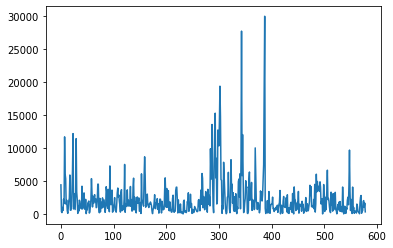

In [88]:
sns.lineplot(x=df.index.values,y=df['diff'].values)

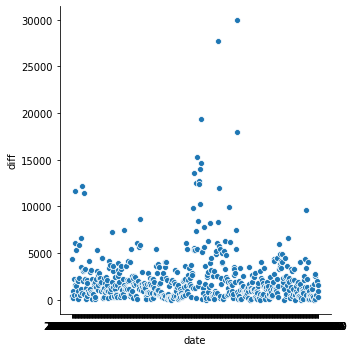

In [100]:
sns.relplot(data=df,x='date',y='diff',x_bins=30)

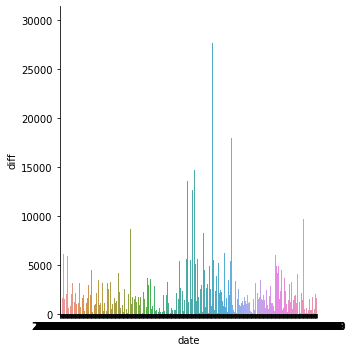

In [96]:
sns.catplot(data=df,x='date',y='diff',kind='bar')

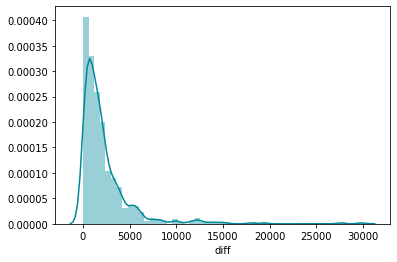

In [117]:
sns.distplot(df['diff'],bins=50,color='#008899',)

In [122]:
results=df

In [123]:
import matplotlib.pyplot as plt

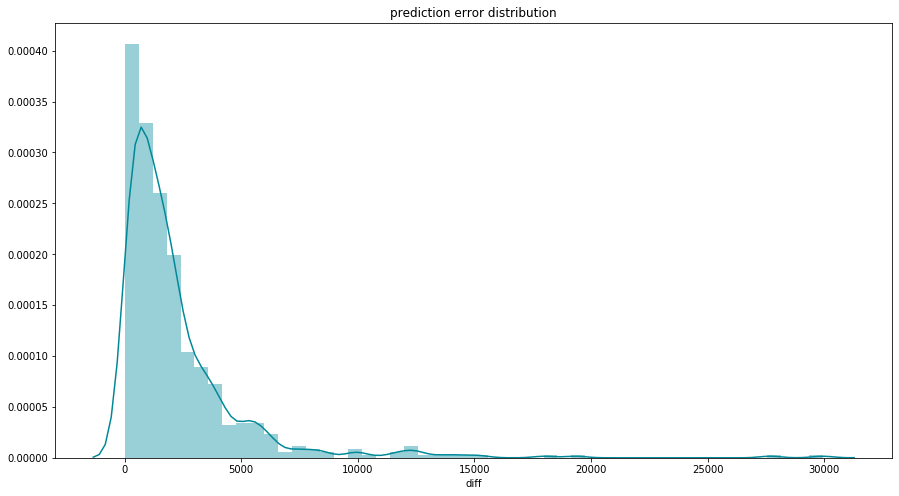

In [126]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 8)
ax.set_title('prediction error distribution')
sns.distplot(results['diff'], bins=50, color='#008899', ax=ax)
#fig.savefig(monname + '.png', dpi=200)